In [1]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\Rohan Krishna Ullas\Downloads


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import keras
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.applications import ResNet50


df1 = pd.read_csv("fer2013.csv")

print(df1.emotion.value_counts())
print(df1.head())

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


(48, 48)


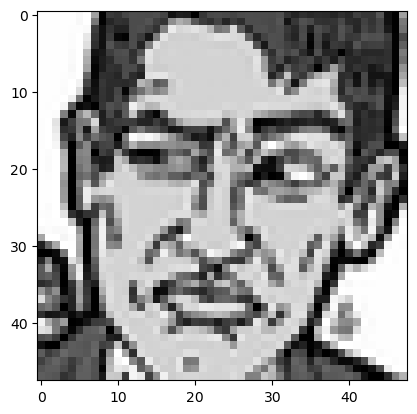

(48, 48)


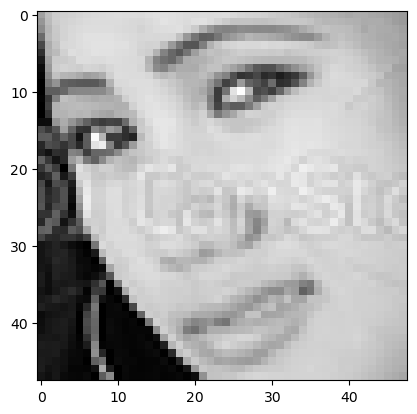

(48, 48)


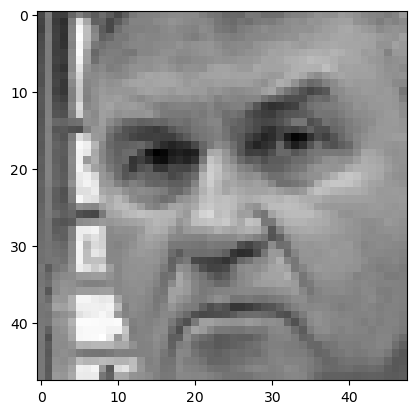

(48, 48)


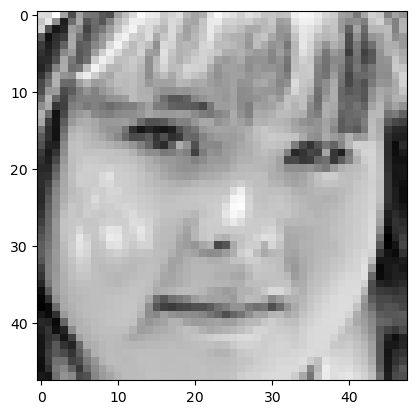

(48, 48)


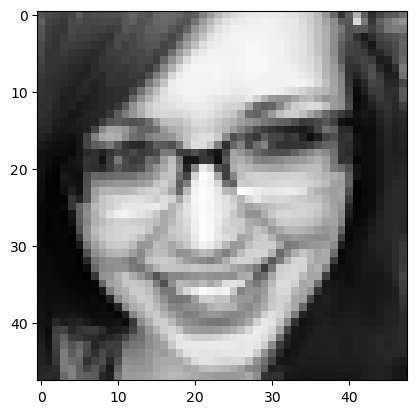

(48, 48)


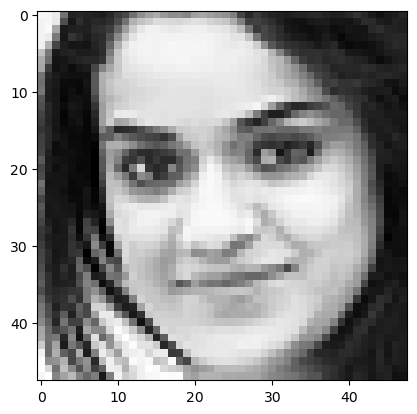

(48, 48)


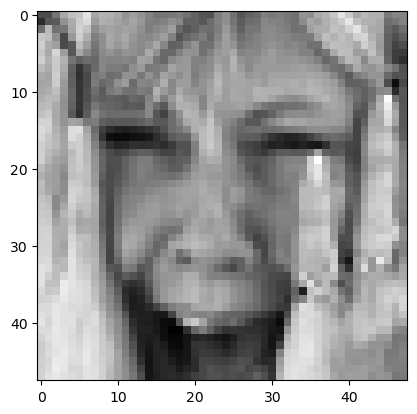

(48, 48)


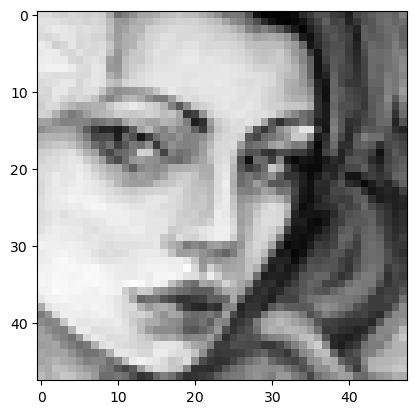

(48, 48)


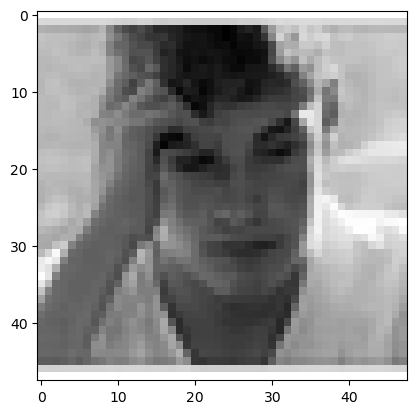

(48, 48)


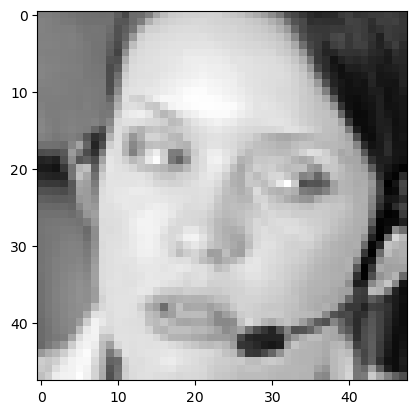

(28709, 48, 48, 1)


In [5]:
# Preprocessing
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for i,row in df1.iterrows():
    k=row['pixels'].split(" ")
    if(row['Usage']=='Training'):
        x_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif(row['Usage']=='PublicTest'):
        x_test.append(np.array(k))
        y_test.append(row['emotion'])

x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

x_train=x_train.reshape(x_train.shape[0],48,48)
x_test=x_test.reshape(x_test.shape[0],48,48)
y_train=tf.keras.utils.to_categorical(y_train,num_classes=7)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=7)

import matplotlib.pyplot as plt
for i in range(10):
  image=x_test[i].reshape((48,48))
  image=image.astype('float32')
  print(image.shape)
  plt.imshow(image,cmap=plt.cm.gray)
  plt.show()

'''
#Changing grayscale image shape to rgb image shape
#Repeating the image array 3 times on a new dimension. Because you will have the same image over all 3 channels, the performance of the model should be the same as it was on RGB images
print(x_train.shape)  # (64, 224, 224)
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
x_test = np.repeat(x_test[..., np.newaxis], 3, -1)
print(x_train.shape)  # (64, 224, 224, 3)
'''

#data augmentation
x_train=x_train.reshape((x_train.shape[0],48,48,1))
x_test=x_test.reshape((x_test.shape[0],48,48,1))
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=60,
                                   shear_range=0.5,
                                   zoom_range=0.5,
                                   width_shift_range=0.5,
                                   height_shift_range=0.5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)
validation_datagen.fit(x_test)

print(x_train.shape)


In [14]:
import tensorflow as tf
from tensorflow import keras

# Créer un modèle CNN simplifié avec Keras
model = keras.Sequential([
    # Premier bloc : Convolution + Pooling
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Deuxième bloc : Convolution + Pooling
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Aplatissage et couche de sortie
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [12]:
print(model.summary())

#Model Plot
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1179712   
                                                                 
 dense_3 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1,180,487
Trainable params: 1,180,487
Non-trainable params: 0
____________________________________________

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [10]:
pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [15]:
import tensorflow as tf
from tensorflow import keras

# Prétraitement des données
x_train = x_train.astype('float32') / 255.0  # Normalisation ajoutée pour une meilleure performance du modèle
x_test = x_test.astype('float32') / 255.0    # Normalisation ajoutée pour une meilleure performance du modèle

# Callbacks simplifiés
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Entraînement du modèle
model.fit(
    x_train, y_train,
    batch_size=164,  # Ajustez selon la capacité de votre système et la taille de votre jeu de données
    epochs=10,       # Réduit pour simplifier et accélérer l'entraînement
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stopping]  # Ajoutez cette ligne si vous souhaitez utiliser le callback EarlyStopping
)


Epoch 1/10
176/176 [==============================] - 14s 78ms/step - loss: 1.8186 - accuracy: 0.2510 - val_loss: 1.8150 - val_accuracy: 0.2494
Epoch 2/10
176/176 [==============================] - 14s 79ms/step - loss: 1.8131 - accuracy: 0.2513 - val_loss: 1.8149 - val_accuracy: 0.2494
Epoch 3/10
176/176 [==============================] - 14s 78ms/step - loss: 1.8130 - accuracy: 0.2513 - val_loss: 1.8123 - val_accuracy: 0.2494
Epoch 4/10
176/176 [==============================] - 14s 80ms/step - loss: 1.8114 - accuracy: 0.2513 - val_loss: 1.8121 - val_accuracy: 0.2494
Epoch 5/10
176/176 [==============================] - 14s 82ms/step - loss: 1.8121 - accuracy: 0.2513 - val_loss: 1.8117 - val_accuracy: 0.2494
Epoch 6/10
176/176 [==============================] - 15s 84ms/step - loss: 1.8122 - accuracy: 0.2513 - val_loss: 1.8126 - val_accuracy: 0.2494
Epoch 7/10
176/176 [==============================] - 15s 87ms/step - loss: 1.8122 - accuracy: 0.2513 - val_loss: 1.8125 - val_accuracy:

In [13]:
print(model.evaluate(x_test,y_test))

113/113 [==============================] - 1s 5ms/step - loss: 1.3182 - accuracy: 0.5035
[1.3182291984558105, 0.5034828782081604]


In [15]:
fer_json = model.to_json()  
with open("mokh++.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("mokh++.h5")  

In [16]:
cd

C:\Users\user


In [ ]:
from keras.models import model_from_json  
#from keras.preprocessing import image 
#from tensorflow.keras.preprocessing.image import img_to_array 
from keras.utils import load_img, img_to_array
import numpy as np

import cv2 
  

#load model  
model = model_from_json(open("mokh++.json", "r").read())  
#load weights  
model.load_weights('mokh++.h5')  
''
  
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  
  
  
cap=cv2.VideoCapture(0)  
  
while True:  
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image  
    if not ret:  
        continue  
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)  
  
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)
    print(faces_detected)
  
  
    for (x,y,w,h) in faces_detected:  
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)  
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image  
        roi_gray=cv2.resize(roi_gray,(48,48))  
        img_pixels = img_to_array(roi_gray)  
        img_pixels = np.expand_dims(img_pixels, axis = 0)  
        img_pixels /= 255  
  
        predictions = model.predict(img_pixels)  
  
        #find max indexed array  
        max_index = np.argmax(predictions[0])  
  
        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')  
        predicted_emotion = emotions[max_index]  
        print(predicted_emotion)
  
        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)  
  
    resized_img = cv2.resize(test_img, (1000, 700))  
    cv2.imshow('Facial emotion analysis ',resized_img)  
  
  
  
    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed  
        break  
  
cap.release()  
cv2.destroyAllWindows 




()
()
()
()
()
()
()
()
()
()
()
()
[[339 206 189 189]]
1/1 [==============================] - 0s 241ms/step
neutral
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[350 207 181 181]]
1/1 [==============================] - 0s 18ms/step
neutral
[[351 204 187 187]]
1/1 [==============================] - 0s 17ms/step
neutral
[[351 204 187 187]]
1/1 [==============================] - 0s 18ms/step
neutral
[[346 200 191 191]]
1/1 [==============================] - 0s 17ms/step
neutral
[[344 201 189 189]]
1/1 [==============================] - 0s 19ms/step
neutral
()
()
()
[[373 196 196 196]]
1/1 [==============================] - 0s 17ms/step
neutral
()
[[ 75 312 152 152]]
1/1 [==============================] - 0s 17ms/step
neutral
[[ 75 312 152 152]]
1/1 [==============================] - 0s 17ms/step
neutral
[[420 186 198 198]
 [ 80 311 154 154]]
1/1 [==============================] - 0s 19ms/step
neutral
1/1 [==============================] - 0s 16ms/step
neutral
[[ 77 297 164 164]]
1/1 

In [ ]:
pip install opencv-python